## Anamoly 
* Anamoly detection
* remove anomalous data from the dataset
* Fraud detection
* fraud detection, fault detection, system health monitoring, event detection in sensor networks, and   detecting ecosystem disturbances
* class1 represents fraud transactions, 0 otherwise

In [1]:
# Import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os,time
from sklearn.preprocessing import StandardScaler


In [2]:
# read the data

current_path = os.getcwd()
file = "\\creditcard_csv.csv"
data = pd.read_csv(current_path+file)
data.shape

(284807, 31)

In [3]:
# checking null values in dataframe
data.isnull().values.any()

False

In [4]:
len(data.columns)

31

### Exploratory Data Analysis

In [5]:
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes

'0'    284315
'1'       492
Name: Class, dtype: int64

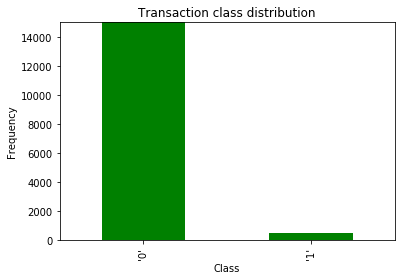

In [6]:
data['Class'].value_counts().plot(kind = 'bar',color ='g')
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Transaction class distribution")
plt.ylim(0,15000)
plt.show()

In [7]:
data1 = data.sample(frac = 0.1,random_state=1) # in persentages frac = 0.1
data1.shape

(28481, 31)

In [8]:
fraud = data1[data1['Class']==1]
fraud.shape

(0, 31)

In [9]:
valid = data1[data1['Class']==0]
valid.shape

(0, 31)

In [10]:
outlier_fraction = len(fraud)/len(valid)
outlier_fraction*100

ZeroDivisionError: division by zero

In [ ]:
data1.corr()

In [ ]:
import seaborn as sns

corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[corrmat.index].corr(),annot=True,cmap="RdYlGn")

### Isolation Forest Algorithm 

* Isolating anomaly observations is easier because only a few conditions are needed to separate those   cases from the normal observations

In [ ]:
from sklearn.ensemble import IsolationForest
forest = IsolationForest(n_estimators=100)

In [ ]:

X = data1.drop(['Class'],axis=1)
X.shape

In [ ]:
forest.fit(X)

In [ ]:
preds = forest.predict(X)

In [ ]:
preds

In [ ]:
y = data1['Class']
y

In [ ]:
preds[preds == 1 ] = 0
preds[preds == -1 ] = 1
errors = (preds != y ).sum()
errors

In [ ]:
y = data['Class']
y

In [ ]:
# do feture scaling
featureScale = StandardScaler()
data_Scaled =  featureScale.fit_transform(X)

In [ ]:
# prepare for training
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

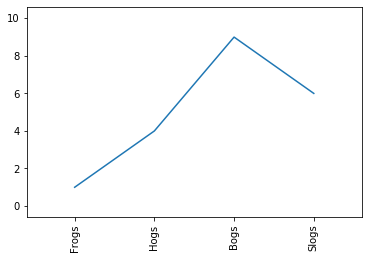

In [11]:
import matplotlib.pyplot as plt


x = [1, 2, 3, 4]
y = [1, 4, 9, 6]
labels = ['Frogs', 'Hogs', 'Bogs', 'Slogs']

plt.plot(x, y)
# You can specify a rotation for the tick labels in degrees or with keywords.

# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()